In [1]:
# importing libraties
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read image and template
image = cv2.imread('image.png')
template = cv2.imread('template.png')
(templateHeight, templateWidth) = template.shape[:2]

Original Image


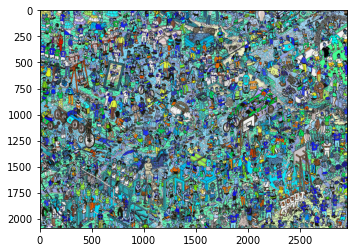

In [3]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Original Image")
plt.imshow(image)

In [4]:
# matching
matchResult = cv2.matchTemplate(image, template, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(matchResult)

topLeft = maxLoc
botRight = (topLeft[0] + templateWidth, topLeft[1] + templateHeight)
roi = image[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]
 
mask = np.zeros(image.shape, dtype = "uint8")
image = cv2.addWeighted(image, 0.25, mask, 0.75, 0)

image[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi
 
cv2.imwrite("matchedTemplate.png", image)

True

Matched Template Image


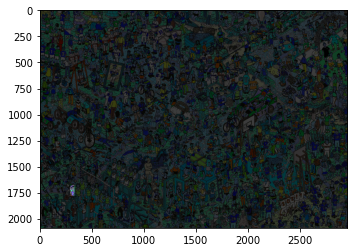

In [5]:
# matched image
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Matched Template Image")
plt.imshow(image)